In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import bisect
from collections import Counter

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = (12,3)
uniform_sample = np.random.uniform(size=100000)

# Question 1

### part a

$$
\begin{align}
p(k+1) 
&= {n \choose k+1}
   \cdot p^{k+1}
   \cdot (1-p)^{n-(k+1)} \\
&= \frac{n!}{(k+1)! \cdot (n-(k+1))!}
   \cdot p^k \cdot p
   \cdot (1-p)^{n-k}/(1-p) \\
&= \frac{n!}{(k+1) \cdot k! \cdot (n-k)!/(n-k)}
   \cdot p^k
   \cdot (1-p)^{n-k} 
   \cdot \frac{p}{1-p} \\
&= \frac{n-k}{k+1} \cdot \frac{p}{1-p} \cdot \frac{n!}{k! \cdot (n-k)!}
   \cdot p^k \cdot (1-p)^{n-k} \cdot  \\
&= \frac{n-k}{k+1} \cdot 
   \frac{p}{1-p} \cdot p(k)
\quad \quad \text{(shown)}
\end{align}
$$

### part b

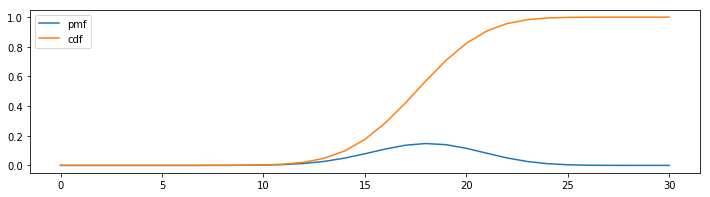

checking pmf_sum and cdf_limit:  1.0 1.0


In [3]:
n,p = 30,0.6

def pmf_next(k, p_of_k):
    return (n-k)/(k+1) * p/(1-p) * p_of_k

pmf_1 = []
p_of_k = (1-p)**n  # k=0
for k in range(n+1):
    pmf_1.append(p_of_k)
    p_of_k = pmf_next(k, p_of_k)

cdf_1 = np.cumsum(pmf_1)
plt.plot(pmf_1, label="pmf")
plt.plot(cdf_1, label="cdf")
plt.legend()
plt.show()
print("checking pmf_sum and cdf_limit: ", sum(pmf_1), cdf_1[-1])

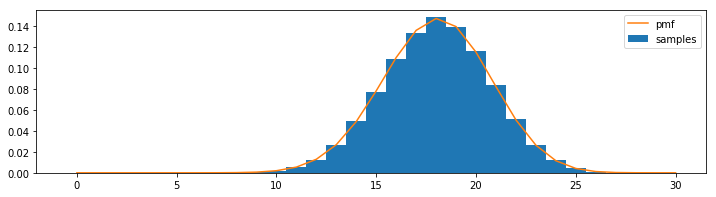

In [4]:
samples_1 = []
for u in uniform_sample:
    index = bisect.bisect_left(cdf_1, u)
    samples_1.append(index)

plt.hist(samples_1, bins=np.arange(31), 
         density=True, align="left", label="samples")
plt.plot(pmf_1, label="pmf")
plt.legend()
plt.show()

<div style="page-break-after: always;"></div>

# Question 2
The function $g(x)$ will be <br>
$\frac{1}{2} e^{-x/2}$ for $x\geq0$ and $0$ for $x<0$ <br>
with $c = 2$

We have calculated that 
- $c \cdot g(1) > f(1)$
- $c \cdot g(x)$ does not intersect with $f(x)$ for $x>0$

Therefore $c \cdot g(x) \geq f(x) \enspace \forall x$

PDF $g(x) = \frac{1}{2} e^{-x/2}$ for $x \geq 0$ <br>
CDF $G(x) = 1-e^{-x/2}$ for $x>0$ <br>
CDF_inv $G^{-1}(x) = -2\log(1-y)$

In [5]:
def pdf_2f(x):
    if x<0:
        return 0
    return 0.5*(1+x)*np.e**(-x)

def pdf_2g(x):
    if x<0:
        return 0
    return 0.5*np.e**(-x/2)

c = 2

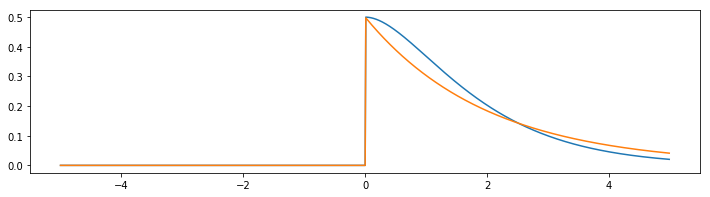

In [6]:
plot_range = np.arange(-5,5,0.01)
plt.plot(plot_range, [pdf_2f(x) for x in plot_range])
plt.plot(plot_range, [pdf_2g(x) for x in plot_range])
plt.show()

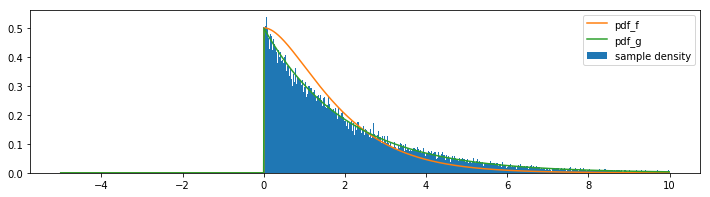

In [7]:
def cdf_inv_2f(x):
    return -2*np.log(1-x)

samples_2 = [cdf_inv_2f(x) for x in uniform_sample]

plot_range = np.arange(-5,10,0.01)
plt.hist(samples_2, bins = plot_range, density=True, align="left", label="sample density")
plt.plot(plot_range, [pdf_2f(x) for x in plot_range], label="pdf_f")
plt.plot(plot_range, [pdf_2g(x) for x in plot_range], label="pdf_g")
plt.legend()
plt.show()

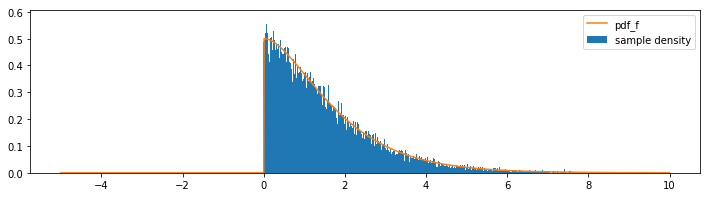

number of samples:  49608


In [8]:
def ar_method(pdf_g,pdf_f,c,cdf_inv_g,u):
    x = cdf_inv_g(u)
    if np.random.uniform() > pdf_f(x)/(c*pdf_g(x)):
        return np.nan  # will be removed later
    return x
        
samples = [ar_method(pdf_2g, pdf_2f, c, cdf_inv_2f, u) for u in uniform_sample]
samples = [r for r in samples if r == r]  # remove rejected

plt.hist(samples, bins = plot_range, density=True, align="left", label="sample density")
plt.plot(plot_range, [pdf_2f(x) for x in plot_range], label="pdf_f")
plt.legend()
plt.show()
print("number of samples: ", len(samples))

<div style="page-break-after: always;"></div>

# Question 3

CDF $F(x) = 1 - \frac{1}{x^3}$ <br>
CDF_inv $F^{-1}(x) = (1-x)^{1/3}$


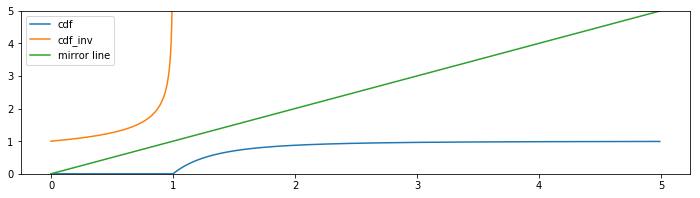

In [9]:
def cdf_3(x):
    if x<1:
        return 0
    return 1-1/x**3
plot_range = np.arange(0,5,0.01)
plt.plot(plot_range, [cdf_3(x) for x in plot_range], label="cdf")

def cdf_inv_3(x):
    if x<0:
        return None
    if x>1:
        return None
    return (1-x)**-(1/3)

plot_range_short = np.arange(0,1,0.005)
plt.plot(plot_range_short, [cdf_inv_3(x) for x in plot_range_short], label="cdf_inv")

plt.ylim(0,5)
plt.plot(plot_range, plot_range, label="mirror line")
plt.legend()
plt.show()

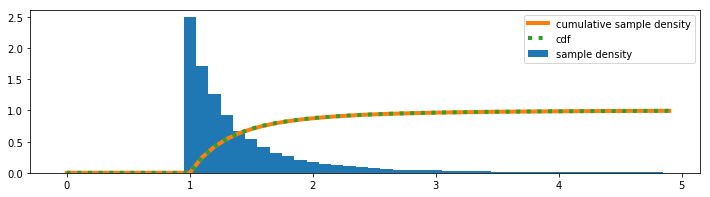

In [10]:
samples = [cdf_inv_3(u) for u in uniform_sample]

plot_range = np.arange(0,5,0.1)
c = Counter(np.digitize(samples, plot_range)*0.1)

freqlist = [c[i]/len(uniform_sample) for i in plot_range]
freqlist_cumulative = np.cumsum(freqlist)

plt.hist(samples, bins = plot_range, 
         density=True, align="left", label="sample density")
plt.plot(plot_range, freqlist_cumulative, 
         lw=4, label="cumulative sample density")
plt.plot(plot_range, [cdf_3(x) for x in plot_range], 
         linestyle=":", lw=4, label="cdf")
plt.legend()
plt.show()

<div style="page-break-after: always;"></div>

# Question 4
We observe the pdf if we follow the method of the required random variable.

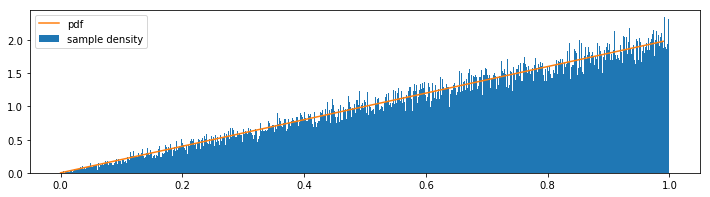

In [11]:
plot_range = np.arange(0,1,0.01)
uniform_sample_1 = np.random.uniform(size=100000)
uniform_sample_2 = np.random.uniform(size=100000)
uniform_sample_max = [max(a,b) for a,b in zip(uniform_sample_1, uniform_sample_2)]
plt.hist(uniform_sample_max, bins=1000, density=True, label="sample density")
plt.plot(plot_range, [2*x for x in plot_range], label="pdf")
plt.legend()
plt.show()

We see that the pdf is $2x$. Following is an explaination and justification why the pdf is $2x$.

The generation of the required rv is equivalent with this process

- Take a sample from standard uniform random, call it a. 
- Take another sample from standard uniform random, call it b.
- We accept $a$ if $a>b$. Or else we reject and repeat the process until this condition is fulfilled.

The probability of accepting $a$ is proportional to the value of $a$. Therefore, the pdf of the required rv is proportional to x, for $0<x<1$. 

The coefficient has to be $2$ such that the area under the pdf is one. Therefore:

PDF $f(x) = 2x$ <br>
CDF $F(x) = x^2$ <br>
CDF_inv $F^{-1}(x) = \sqrt{x}$

The samples are generated with the inverse cdf

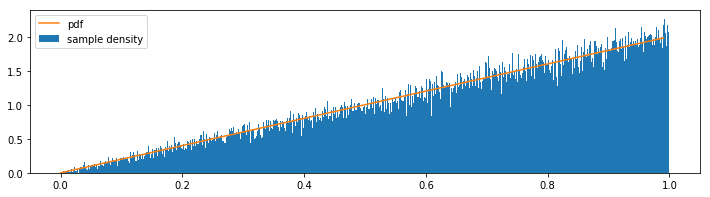

In [12]:
samples = np.sqrt(uniform_sample)
plt.hist(samples, bins=1000, density=True, label="sample density")
plt.plot(plot_range, [2*x for x in plot_range], label="pdf")
plt.legend()
plt.show()

<div style="page-break-after: always;"></div>

# Question 5

### part a
$$
\begin{align}
\tilde{U} &= F_Y(a)(1-U) + F_Y(b)U \\
\tilde{U} &= F_Y(a) - F_Y(a)U + F_Y(b)U \\
\tilde{U} &= F_Y(a) + \left[F_Y(b) - F_Y(a)\right]U \\
\end{align}
$$

We can see that $\tilde{U}$ is uniformlly distributed between $F_Y(a)$ and $F_Y(b)$.

Therefore

$$
\tilde{U} = \frac{F_Y(x) - F_Y(a)}{F_Y(b) - F_Y(a)}
$$

You can consider the representation of RHS of the above expression on the y-axis of the CDF graph - the random variable $F_Y(x)$ is equally distributed in between $F_Y(b) - F_Y(a)$

### part b

To show

$$
P(X \leq x) = P(Y \leq x | a \leq Y \leq b)
$$

Computing LHS

$$
\begin{align}
LHS &= P(Y \leq x | a \leq Y \leq b)\\ \\
    &= \frac{P(Y \leq x, a \leq Y \leq b)}{P(a \leq Y \leq b)}\\ \\
    &= \frac{P(a \leq Y \leq x)}{P(a \leq Y \leq b)}\\ \\
    &= \frac{F_Y(x) - F_Y(a)}{F_Y(b) - F_Y(a)}\\ \\
\end{align}
$$

Computing RHS

$$
\begin{align}
LHS &= P(X \leq x) \\ \\
    &= P(F^{-1} (\tilde{U}) \leq x)\\ \\
    &= P(\tilde{U} \leq F_Y(x))\\ \\
    &= \frac{F_Y(x) - F_Y(a)}{F_Y(b) - F_Y(a)}\\ \\
\end{align}
$$

<div style="page-break-after: always;"></div>

### part c
For exponential distribution: <br>
PDF $f(x) = e^{-x}$ <br>
CDF $F(x) = 1-e^{-x}$ <br>
CDF_inv $F^{-1}(x) = -\log(1-x)$

In [13]:
a = 5
b = 10

def pdf_5y(x):
    return np.exp(-x)

def cdf_5y(x):
    return 1-np.exp(-x)

def cdf_inv_5y(x):
    return -np.log(1-x)

def u_limited(x):
    return cdf_5y(a) + (cdf_5y(b) - cdf_5y(a)) * x

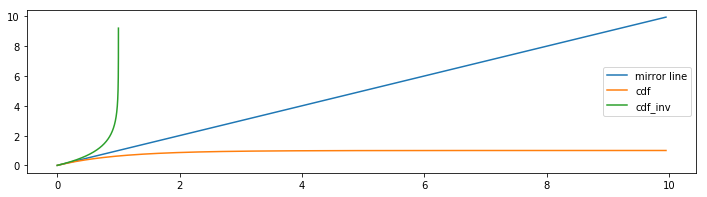

In [14]:
plot_range = np.arange(0,10,0.05)
plt.plot(plot_range, plot_range, label="mirror line")
plt.plot(plot_range, [cdf_5y(x) for x in plot_range], label="cdf")
plot_range = np.arange(0,1,0.0001)
plt.plot(plot_range, [cdf_inv_5y(x) for x in plot_range], label="cdf_inv")
plt.legend()
plt.show()

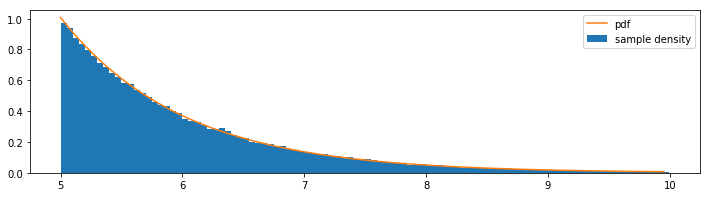

In [15]:
samples = [cdf_inv_5y(ut) for ut in [u_limited(u) for u in uniform_sample]]
c = 1/(np.exp(-5) - np.exp(-10))

plot_range = np.arange(5,10,0.05)
plt.hist(samples, bins=100, density=True, label="sample density")
plt.plot(plot_range, [c*pdf_5y(x) for x in plot_range], label="pdf")
plt.legend()
plt.show()